# CH04. Leraning of Neural Network

### 4.2.1 평균 제곱 오차

<font size=4>$$
MSE = \frac{1}{n}\sum_{t=1}^{n}(y_k - t_k)^2   
$$</font>

In [1]:
%precision %.5f

'%.5f'

#### MSE 구현체

In [2]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

#### MSE 예제 1

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_hat = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print("sum of y_hat", np.sum(y_hat))
"MSe", mean_squared_error(np.array(y_hat), np.array(t))

sum of y_hat 1.0


('MSe', 0.09750000000000003)

#### MSE 예제 2

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_hat=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("sum of y_hat", np.sum(y_hat))
"MSe", mean_squared_error(np.array(y_hat), np.array(t))

sum of y_hat 1.0


('MSe', 0.5975)

### 4.2.2 교차 엔트로피 오차

In [5]:
x = np.arange(0.01, 1.0, 0.01)
y = np.log(x)

In [6]:
import matplotlib.pyplot as plt

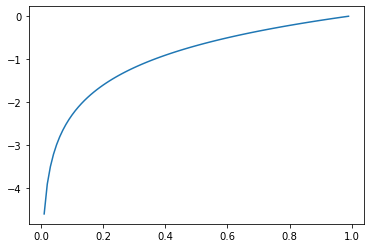

In [7]:
plt.plot(x, y)
plt.show()

#### 교차 엔트로피 구현체

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

#### 교차 엔토로피 예제1

In [9]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_hat = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y_hat), np.array(t))

0.510825457099338

#### 교차 엔토로피 예제2

In [10]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_hat=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y_hat), np.array(t))

2.302584092994546

### 4.3.2 미니 배치

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
def flatten(data, flatten_size):
    return data.reshape(-1, flatten_size)

In [14]:
x_train = flatten(train_images, 28*28)
x_train.shape

(60000, 784)

In [15]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])


In [16]:
t_train = one_hot(train_labels, 10)
t_train.shape

(60000, 10)

#### 10개 무작위 데이터 추출

In [17]:
train_size = x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size, batch_size) #train_size 중에서 batch_size 만큼 값 생성

In [18]:
batch_mask

array([17685, 21301, 53902, 57704, 53034, 17995, 42456, 40765, 20108,
        4262])

In [19]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [20]:
x_batch.shape, t_batch.shape

((10, 784), (10, 10))

In [21]:
t_batch

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

### 4.2.4 배치용 교차 엔트로피 오차 구현하기

- One-Hot Encoding을 처리

In [22]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

- 숫자 레이블일 경우

In [23]:
def cross_entopy_error(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(), t]))/batch_size

In [24]:
np.arange(10),  1

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 1)

In [25]:
np.log(np.array([0.6]))

array([-0.51082562])

## 4.3 수치 미분

In [26]:
#나쁜 구현의 예
def numeical_diff(f, x):
    h = 10e-5
    return (f(x+h)-f(x))/h

In [27]:
np.float(10e-10)

0.00000

-  미분 개선안

In [28]:
def numeical_diff(f, x):
    h = 10e-4
    return (f(x+h)-f(x-h))/(2*h)

### 4.3.2 수치 미분의 예

<font size=4>$$
y = 0.01x^2 + 0.1x
$$</font>

In [29]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

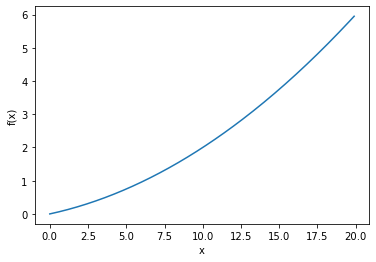

In [32]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [33]:
numeical_diff(function_1, 5)

0.20000

In [34]:
numeical_diff(function_1, 10)

0.30000

### 4.3.3 편미분

<font size=4>$$
f(x_0, x_1)=x_0^2 +x_1^2
$$</font>

In [35]:
def function_2(x):
    ## return np.sum(x**2)
    return x[0]**2+x[1]**2
    

- 문제: x0=3, x1=4일 때, x0에 대한 편미분 $ \frac{\partial f }{\partial x_0} $를 구하라.

In [36]:
def function_tmp1(x0):
    return X0*X0+4.0**2.0

In [38]:
numeical_diff(function_1, 3.0)

0.16000

In [133]:
def numerial_gradient(f, x):
    h=1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h)
        x[idx] = tmp_val+h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = tmp_val-h
        fxh2 = f(x)
    
        grad[idx]=(fxh1-fxh2)/(2*h)
        #값 복원
        x[idx]=tmp_val
    
    return grad

In [135]:
numerial_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [136]:
numerial_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [137]:
numerial_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 4.4.1 경사 하강법

In [138]:
def gradient_descent(f, init_x, lr=0.001, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerial_gradient(f, x)
        x -= lr * grad
    
    return x

In [139]:
def function_2(x):
    return x[0]**2+x[1]**2

In [148]:
init_x = np.array([-3.0, 4.0])

In [149]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

- Learning Rate가 너무 크면
    - lr=10.
    - 발산

In [150]:
gradient_descent(function_2, init_x=init_x, lr=10., step_num=100)

array([ 2.34235971e+12, -3.96091057e+12])

- Learning Rate가 너무 작으면
    - lr=1e-10
    - 학습 지연

In [151]:
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([ 2.34235971e+12, -3.96091057e+12])

### 4.4.2 신경망에서 기울기

In [2]:
import numpy as np
from common.functions import softmax
from common.functions import cross_entropy_error as cee
from common.gradient import numerical_gradient

In [3]:
class SimpleNet:
    def __init__(self):
        #정규분포 Random 값 초기화
        #float 형
        self.W = np.random.rand(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cee(y, t)
        
        return loss
        

In [4]:
net = SimpleNet()
net.W

array([[0.76803201, 0.61893152, 0.53719941],
       [0.41955648, 0.26808572, 0.79038129]])

In [5]:
x = np.array([0.6, 0.9])

In [6]:
z = net.predict(x)

In [7]:
z, np.argmax(z)

(array([0.83842004, 0.61263606, 1.03366281]), 2)

In [8]:
#정답 레이블
t=np.array([0, 0, 1])

In [9]:
net.loss(x, t)

[[0.33184044 0.26477231 0.40338725]]


0.907858018158074

In [10]:
def f(W):
    return net.loss(x, t)

In [11]:
dW = numerical_gradient(f, net.W)

[[0.33185374 0.26476704 0.40337922]]
[[0.33182714 0.26477759 0.40339528]]
[[0.33183517 0.26478399 0.40338084]]
[[0.33184571 0.26476063 0.40339366]]
[[0.33183241 0.26476591 0.40340169]]
[[0.33184847 0.26477872 0.40337281]]
[[0.33186039 0.26476441 0.4033752 ]]
[[0.33182048 0.26478022 0.40339929]]
[[0.33183253 0.26478983 0.40337763]]
[[0.33184835 0.26475479 0.40339686]]
[[0.33182839 0.2647627  0.40340891]]
[[0.33185249 0.26478193 0.40336559]]


In [12]:
dW

array([[ 0.19910421,  0.15886335, -0.35796756],
       [ 0.29865632,  0.23829502, -0.53695134]])

- lambda 표현식

In [13]:
f = lambda w: net.loss(x, t)
numerical_gradient(f, net.W)

[[0.33185374 0.26476704 0.40337922]]
[[0.33182714 0.26477759 0.40339528]]
[[0.33183517 0.26478399 0.40338084]]
[[0.33184571 0.26476063 0.40339366]]
[[0.33183241 0.26476591 0.40340169]]
[[0.33184847 0.26477872 0.40337281]]
[[0.33186039 0.26476441 0.4033752 ]]
[[0.33182048 0.26478022 0.40339929]]
[[0.33183253 0.26478983 0.40337763]]
[[0.33184835 0.26475479 0.40339686]]
[[0.33182839 0.2647627  0.40340891]]
[[0.33185249 0.26478193 0.40336559]]


array([[ 0.19910421,  0.15886335, -0.35796756],
       [ 0.29865632,  0.23829502, -0.53695134]])

## 4.5 2층 신경망 클래스 구현하기

In [27]:
from common.functions import cross_entropy_error as _cross_entropy_error
from common.functions import sigmoid as _sigmoid
from common.functions import softmax as _softmax
from common.gradient import numerical_gradient as _numerical_gradient
import numpy as np

In [63]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params={}
        self.params['W1']=weight_init_std * np.random.rand(input_size, hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std * np.random.rand(hidden_size, output_size)
        self.params['b2']=np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        z1 = np.dot(x, W1)+b1
        a1 = _sigmoid(z1)
        z2 = np.dot(a1, W2)+b2
        output = _softmax(z2)
        
        return output
    
    def loss(self, x, t):
        y = self.predict(x)
        return _cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t)/float(x.shape(0))
        return accuracy
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads={}
        grads['W1']=_numerical_gradient(loss_W, self.params['W1'])
        grads['b1']=_numerical_gradient(loss_W, self.params['b1'])
        grads['W2']=_numerical_gradient(loss_W, self.params['W2'])
        grads['b2']=_numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [64]:
net = TwoLayerNet(input_size=784,
                  hidden_size=100, 
                  output_size=10)

In [65]:
net.params['W1'].shape, net.params['b1'].shape

((784, 100), (100,))

In [66]:
net.params['W2'].shape, net.params['b2'].shape

((100, 10), (10,))

- 네트워크 사용 예제

In [67]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [68]:
y.shape

(100, 10)

In [69]:
y[0:2]

array([[0.09893698, 0.10239216, 0.10579257, 0.10049369, 0.09952879,
        0.09639021, 0.09985721, 0.09927355, 0.096643  , 0.10069184],
       [0.0989324 , 0.10239267, 0.10578289, 0.10049176, 0.09952279,
        0.09639288, 0.09985281, 0.09927226, 0.09665918, 0.10070037]])

In [70]:
#Softmax의 합은 1
np.sum(y[0:2], axis=1)

array([1., 1.])

- 기울기 계산

In [71]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

In [72]:
%%time
grads = net.numerical_gradient(x, t)

CPU times: user 7min 57s, sys: 10min 2s, total: 17min 59s
Wall time: 6min 7s


### 4.5.2  Mini-Batch 구현

In [42]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist
import numpy as np

In [43]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [44]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

def flatten(data, flatten_size):
    return data.reshape(-1, flatten_size)

In [45]:
x_train = flatten(train_images, 28*28)
t_train = one_hot(train_labels, 10)
x_test = flatten(test_images, 28*28)
t_test = one_hot(test_labels, 10)

In [49]:
train_loss_list = []

In [50]:
#하이퍼 파라미터
iter_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

In [51]:
network = TwoLayerNet(784, 50, 10)

In [ ]:
for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ['W1', 'b1', 'W2', 'b2']:
        netowrk.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

In [46]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist
import numpy as np


In [47]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

def flatten(data, flatten_size):
    return data.reshape(-1, flatten_size)

In [48]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [50]:
x_train = flatten(train_images, 28*28)
t_train = one_hot(train_labels, 10)
x_test = flatten(test_images, 28*28)
t_test = one_hot(test_labels, 10)

In [51]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

KeyboardInterrupt: 